In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df= pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
5,WBY33AW0XP,King,Seattle,WA,98109.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,238283545,POINT (-122.3441532 47.6305366),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
6,5YJ3E1EB5L,King,Bothell,WA,98011.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,1.0,123837269,POINT (-122.201408 47.754528),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
7,1V2GNPE86P,King,Sammamish,WA,98075.0,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,266068799,POINT (-122.0181135 47.5880568),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
8,WVWPP7AU0G,King,Bellevue,WA,98004.0,2016,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,83,0,48.0,156800388,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
9,3C3CFFGE8D,King,Bellevue,WA,98004.0,2013,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,41.0,267527928,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [4]:
df.shape

(186879, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,186876.000000,186879.000000,186879.000000,186879.000000,186476.000000,1.868790e+05,1.868760e+05
mean,98177.500144,2020.659614,56.707790,1011.918487,29.069012,2.225627e+08,5.297773e+10
std,2374.643395,2.991398,90.788807,8115.767740,14.900971,7.463672e+07,1.570887e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.850864e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.302081e+08,5.303303e+10
75%,98371.000000,2023.000000,73.000000,0.000000,42.000000,2.577993e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [8]:
df['Make'].unique()


array(['BMW', 'TESLA', 'VOLKSWAGEN', 'FIAT', 'NISSAN', 'CHEVROLET', 'KIA',
       'JAGUAR', 'SMART', 'VOLVO', 'JEEP', 'LEXUS', 'AUDI', 'HYUNDAI',
       'CHRYSLER', 'FORD', 'PORSCHE', 'MITSUBISHI', 'TOYOTA', 'RIVIAN',
       'HONDA', 'MAZDA', 'MINI', 'LINCOLN', 'SUBARU', 'CADILLAC',
       'GENESIS', 'POLESTAR', 'MERCEDES-BENZ', 'LAND ROVER', 'LUCID',
       'FISKER', 'ALFA ROMEO', 'DODGE', 'GMC', 'TH!NK', 'BENTLEY',
       'AZURE DYNAMICS', 'ROLLS ROYCE', 'WHEEGO ELECTRIC CARS'],
      dtype=object)

In [9]:
df["Make"].value_counts()

Make
TESLA                   83349
NISSAN                  14181
CHEVROLET               14072
FORD                     9836
KIA                      7885
BMW                      7856
TOYOTA                   6766
VOLKSWAGEN               5295
JEEP                     4927
HYUNDAI                  4784
RIVIAN                   4540
VOLVO                    4407
AUDI                     3808
CHRYSLER                 3281
MERCEDES-BENZ            1737
PORSCHE                  1163
MITSUBISHI                991
MINI                      943
POLESTAR                  897
SUBARU                    859
HONDA                     843
FIAT                      784
DODGE                     614
MAZDA                     550
LEXUS                     506
CADILLAC                  490
LINCOLN                   275
SMART                     260
LUCID                     249
JAGUAR                    232
GENESIS                   204
FISKER                    166
LAND ROVER                 57
ALFA 

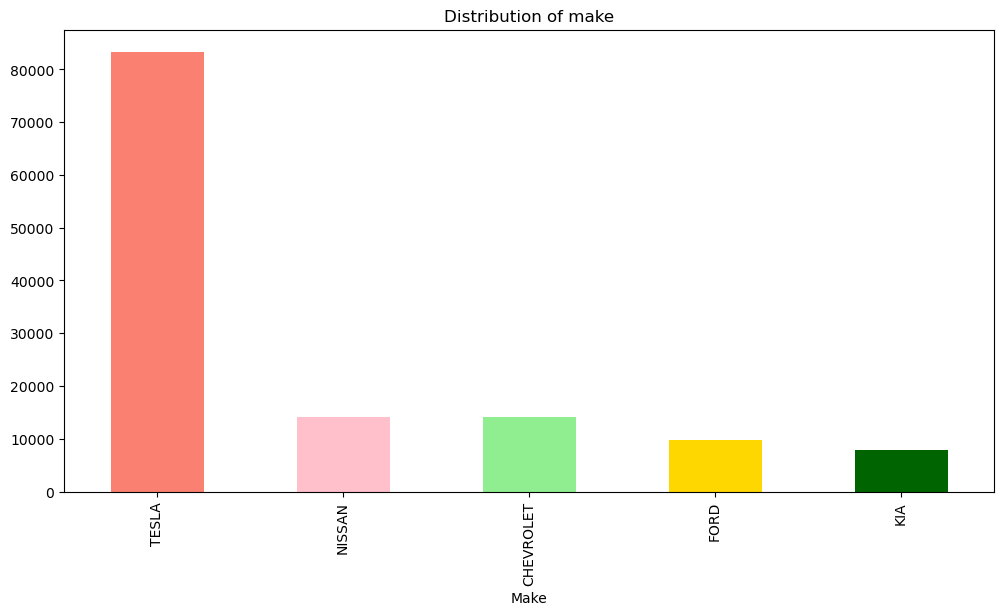

In [10]:
top_makes = df["Make"].value_counts().head(5)
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'darkgreen'])
plt.title('Distribution of make')
plt.show()

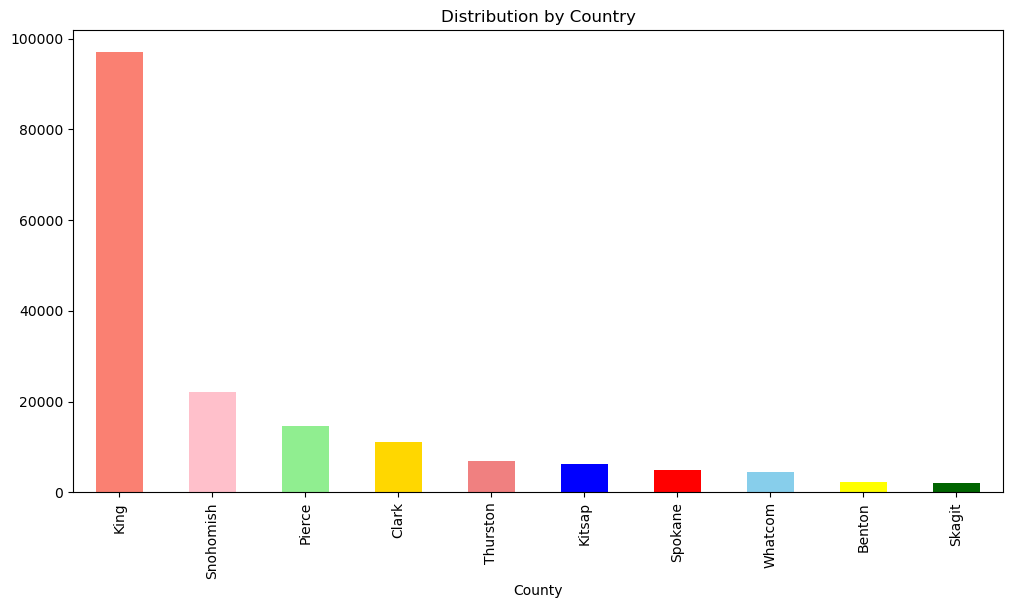

In [11]:
top_makes = df["County"].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'lightcoral', 'blue', 'red', 'skyblue', 'yellow', 'darkgreen'])
plt.title('Distribution by Country')

plt.show()

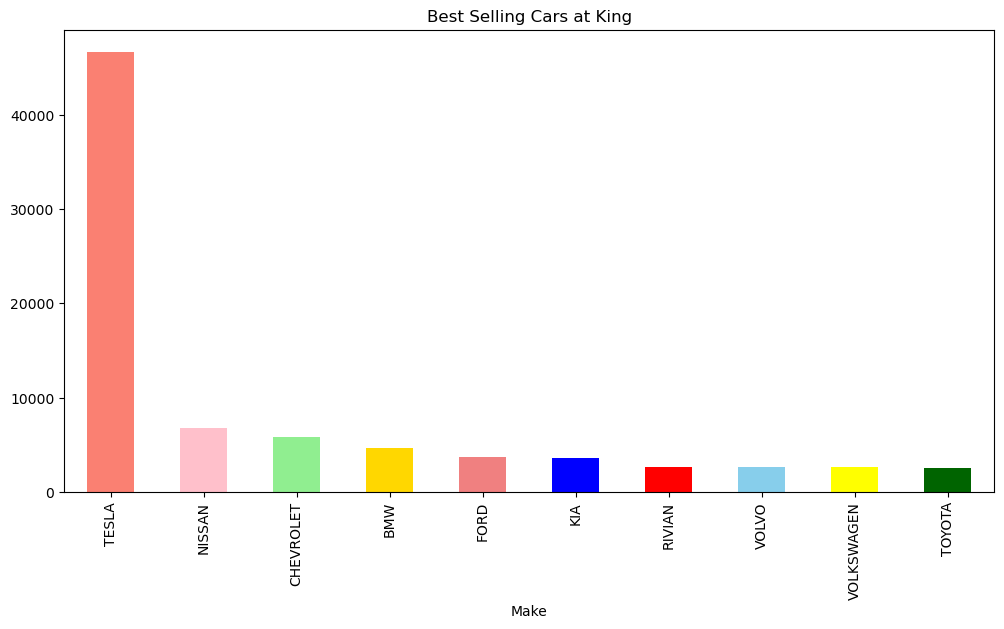

In [12]:
king_data = df[df["County"] == "King"]


unique_makes = king_data["Make"].value_counts().head(10)
plt.figure(figsize=(12, 6))
unique_makes.plot(kind='bar', color = ['salmon','pink' , 'lightgreen', 'gold', 'lightcoral', 'blue', 'red', 'skyblue', 'yellow', 'darkgreen'])

plt.title('Best Selling Cars at King')

plt.show()

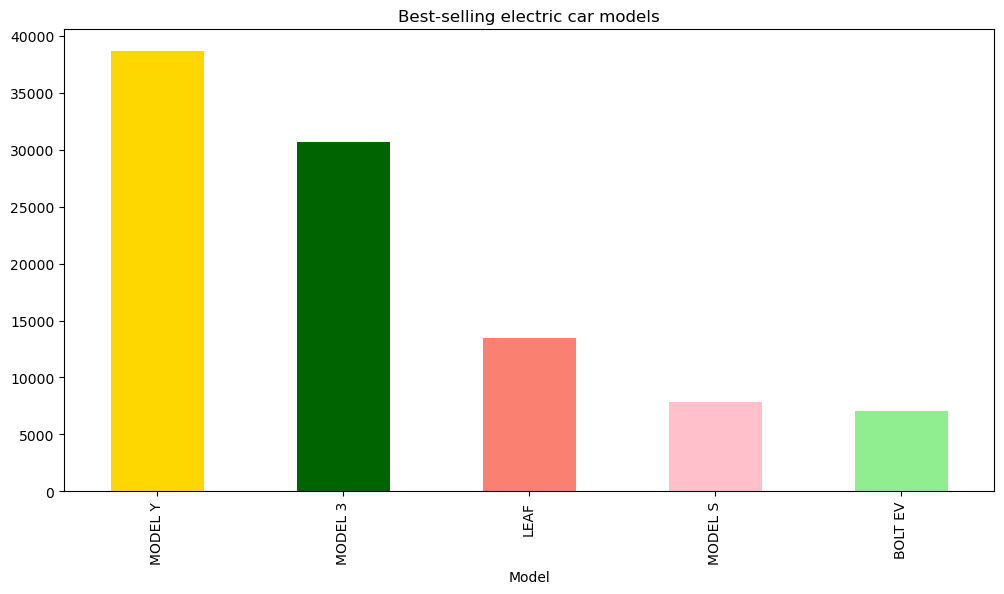

In [13]:
makes = df["Model"].value_counts().head(5)
plt.figure(figsize=(12, 6))
makes.plot(kind='bar', color = ['gold', 'darkgreen','salmon','pink' , 'lightgreen', ])

plt.title('Best-selling electric car models')
plt.show()

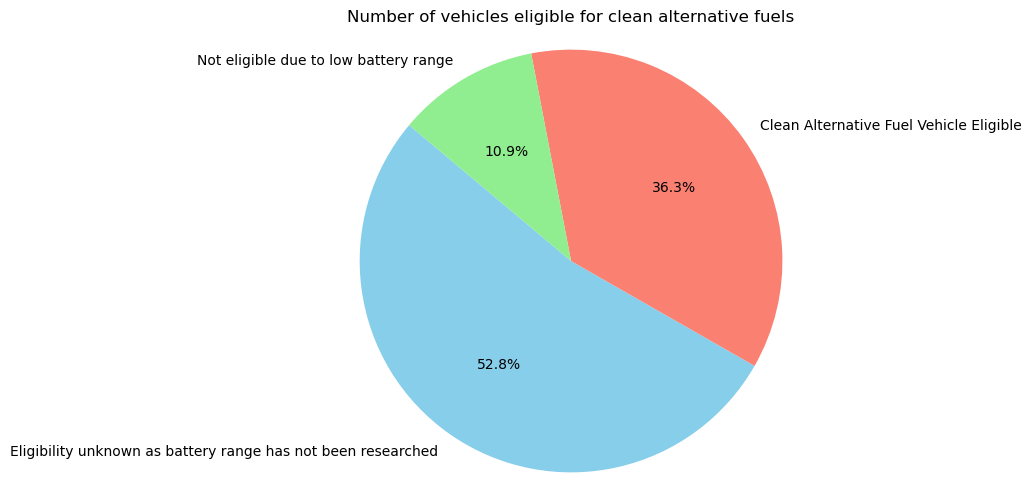

In [14]:
Data = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
value_counts = Data.value_counts()
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral']  

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

plt.title("Number of vehicles eligible for clean alternative fuels")
plt.axis('equal')
plt.show()

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


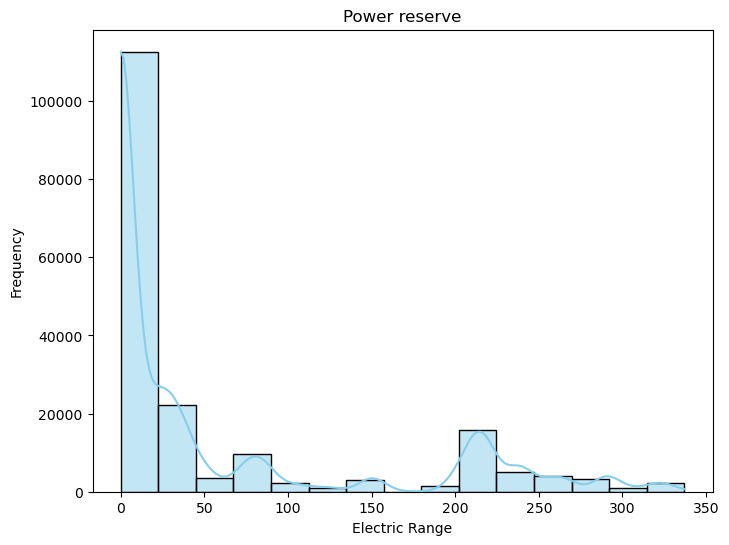

In [15]:
electric_range_data = df["Electric Range"]

plt.figure(figsize=(8, 6))
sns.histplot(data = electric_range_data, bins=15, kde=True, color='skyblue')
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.title("Power reserve")
plt.show()

In [16]:
df['Base MSRP'].value_counts().head(10)

Base MSRP
0        183559
69900      1347
31950       379
52900       220
32250       140
59900       130
54950       129
39995       113
36900       104
44100        97
Name: count, dtype: int64

In [17]:
df = df.dropna()

In [18]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Electric Vehicle Type'] = label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [19]:
# Select features and target variable
X = df[['Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Base MSRP']]
y = df['Electric Vehicle Type']  # Assuming we want to predict the type of electric vehicle

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
# Make predictions
y_pred = model.predict(X_test)

In [24]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [25]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[29194     0]
 [    0  8101]]


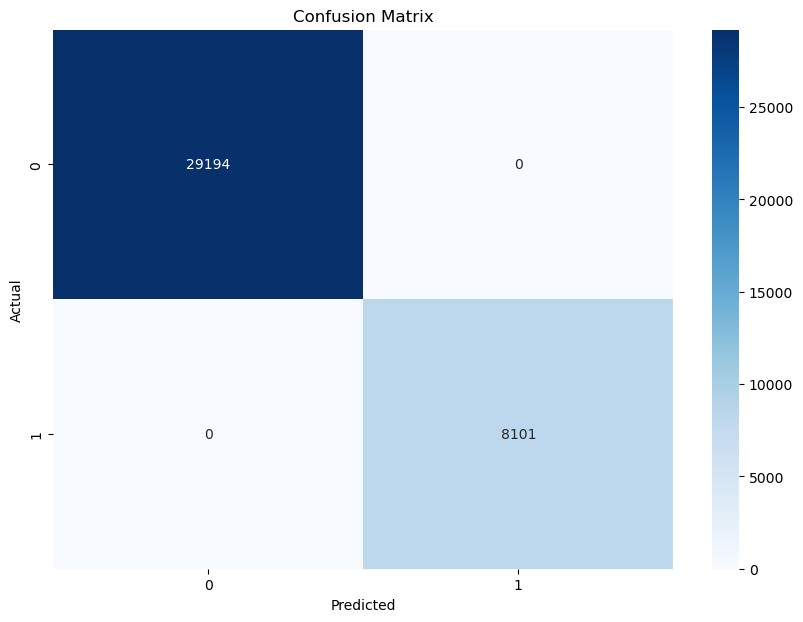

In [26]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()